*based on Alexander Shabalin’s notebooks*

#  Seminar 1: Tokenization & Word Embeddings

### Plan:
1. Text pre-processing:
    * Tokenization
    * Stemming
    * Lemmatization
2. Simple classification:
    * TF-iDF
3. Word2Vec
    * Embeddings visualisation

In [5]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O data/quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

zsh:1: no matches found: https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1


In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

/Users/andreeva.dal/personal/nlp_dsba/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = list(open("data/quora.txt"))
data[50]

"What TV shows or books help you read people's body language?\n"

## 1. Text Preprocessing

We preprocess text to turn messy, human-written language into consistent, model-friendly input.

Preprocessing includes:
- tokenization
- lowercasing
- normalizing punctuation/whitespace
- handling stopwords
- lemmatization/stemming.

These steps allow us to shrink the vocabulary, reduce sparsity, and erase the unnecessary words to reduce the noise and let the model capture meaning rather than formatting quirks. It improves generalization (fewer “cat/Cat/CATS” / "выйти/вышел/вышла/выйду" duplicates), makes training faster and more stable.

The key is restraint: clean what hurts performance (e.g., HTML, duplicates, obvious noise) while preserving semantics (negations, emojis, casing when it matters) so you don’t wash out the very signal you want to learn.

### 1.1. Tokenization

Tokenization is a process of separating text into tokens (sets of symbols). The set of all tokens obtained will become our vocabulary, on which we will train a model. Today, we will look at a method of tokenization by words (one word == one token). Later in the course, we will look at other cases of tokenization, so that a token is not always a whole word, but can also be part of a word.

Tokenization can be implemented using [regular expressions](https://docs.python.org/3/library/re.html). But it is also possible without them.

In [3]:
import re
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
# these two functions do the same job

def tokenize(text):
    for p in punctuation:
        text = text.replace(p, ' ')

    text = text.strip().split()
    return text

def tokenize(text):
    reg = re.compile(r'\w+')
    return reg.findall(text)

In [5]:
print(tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', 's', 'body', 'language']


__`nltk`__ - is a huge library (comparable to `numpy` for matrices). It implements methods for [tokenization](https://www.nltk.org/api/nltk.tokenize.html), [lemmatization](https://www.nltk.org/api/nltk.stem.wordnet.html), [stemming](https://www.nltk.org/api/nltk.stem.html), and much more.

In [6]:
from nltk.tokenize import wordpunct_tokenize

print(wordpunct_tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


**TASK**: make everything lowercase and separate into tokens

In [8]:
data_tok = # YOUR CODE

In [9]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [10]:
print(data_tok[:2])

[['can', 'i', 'get', 'back', 'with', 'my', 'ex', 'even', 'though', 'she', 'is', 'pregnant', 'with', 'another', 'guy', "'", 's', 'baby', '?'], ['what', 'are', 'some', 'ways', 'to', 'overcome', 'a', 'fast', 'food', 'addiction', '?']]


### 1.2. Remove stopwords

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [12]:
def remove_stopwords(tokenized_texts):
    clear_texts = []
    for words in tokenized_texts:
        clear_texts.append([word for word in words if word not in stop_words])

    return clear_texts

In [13]:
data_tok = remove_stopwords(data_tok)

In [14]:
print(data[50])
print(data_tok[50])

What TV shows or books help you read people's body language?

['tv', 'shows', 'books', 'help', 'read', 'people', "'", 'body', 'language', '?']


### 1.3. Lemmatization & Stemming

#### Lemmatization

**Lemmatization** is the process of reducing a word to its canonical dictionary form (the **lemma**):

* for nouns — nominative singular;
* for adjectives — nominative singular, masculine gender;
* for verbs, participles, gerunds — the verb in the infinitive.

For English – `nltk.stem.WordNetLemmatizer`. \
For Russian – `pymorphy2.MorphAnalyzer`.

Lemmatization is a very common way to reduce vocabulary size in classic NLP pipelines.


#### Stemming

**Stemming** is the process of reducing a word to a **stem** by heuristically stripping prefixes/suffixes.
It does **not** guarantee a real dictionary word and usually ignores part of speech and grammar.

* No grammatical normalization (just affix stripping).
* Output can be non-words (e.g., `studies` → `studi`, `кошками` → `кошк`).
* Very fast; often reduces vocabulary more aggressively, but may conflate unrelated forms and hurt precision.

For English – `nltk.stem.PorterStemmer`, `nltk.stem.SnowballStemmer("english")`.\
For Russian – `nltk.stem.SnowballStemmer("russian")` (or other Snowball-based implementations).


#### Examples
##### English:

| Original form(s)            | Stemming (algorithm)        | Lemma (lemmatization) |
| --------------------------- | --------------------------- | --------------------- |
| `studies`                   | `studi` (Porter)            | `study`               |
| `goes`, `going`             | `go` (Porter)               | `go`                 |
| `went`                      | `went` (Porter)             | `go`                  |
| `better` (adj.)             | `better` / `bett` (Porter)  | `good`                |

##### Russian: 

| Original form(s)            | Stemming (algorithm)        | Lemma (lemmatization) |
| --------------------------- | --------------------------- | --------------------- |
| `кошки`, `кошек`, `кошками` | `кошк` (Snowball)           | `кошка`               |
| `читал`, `читала`, `читали` | `чит` (Snowball)            | `читать`              |
| `дети`                      | `дет` (Snowball)            | `ребёнок`             |
| `лучше`                     | `лучш` / `лучше` (Snowball) | `хорошо` / `хороший`  |

#### When to use which?

*Stemming*: fast, good for recall-heavy search baselines; expect noise (“studi”, “comput”). \
*Lemmatization*: slower/heavier, better for accuracy/semantics, crucial in morphologically rich languages (Russian) or with irregular forms.


In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andreeva.dal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(tokenized_texts):
    lemmatized_data = []
    lemmatizer = WordNetLemmatizer()
    for words in tqdm(tokenized_texts):
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_data.append(lemmatized_words)
    return lemmatized_data

In [17]:
from nltk.stem import PorterStemmer

def text_stemming(tokenized_texts):
    stemmed_data = []
    stemmer = PorterStemmer()
    for words in tqdm(tokenized_texts):
        stemmed_words = [stemmer.stem(word) for word in words]
        stemmed_data.append(stemmed_words)
    return stemmed_data

In [18]:
lemmatized_data = lemmatize_text(data_tok)
stemmed_data = text_stemming(data_tok)

  0%|          | 0/537272 [00:00<?, ?it/s]

100%|██████████| 537272/537272 [00:31<00:00, 16863.76it/s]


In [19]:
print(lemmatized_data[50])
print(stemmed_data[50])

['tv', 'show', 'book', 'help', 'read', 'people', "'", 'body', 'language', '?']
['tv', 'show', 'book', 'help', 'read', 'peopl', "'", 'bodi', 'languag', '?']


## 2. Classification

In [20]:
data_train = pd.read_csv('data/ag_news_train.csv', sep='\t')
data_test = pd.read_csv('data/ag_news_test.csv', sep='\t')

In [22]:
data_train.head(5)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [23]:
data_train.text[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [24]:
labels_train = data_train['label']
labels_test = data_test['label']

len(data_train), len(data_test)

(120000, 7600)

Now let's check the classes distribution to decide on the metrics we are going to use.

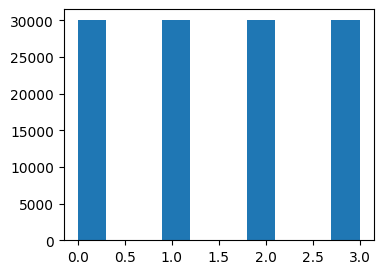

In [25]:
plt.figure(figsize=(4, 3))
plt.hist(labels_train);

Sometimes it is also useful to check the word cloud when using text data:

In [26]:
from wordcloud import WordCloud

def create_cloud_graph(corpus):
    wordcloud = WordCloud(
        width=1600, height=800, max_words=200, background_color='white', collocations=False
    ).generate(' '.join(corpus))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

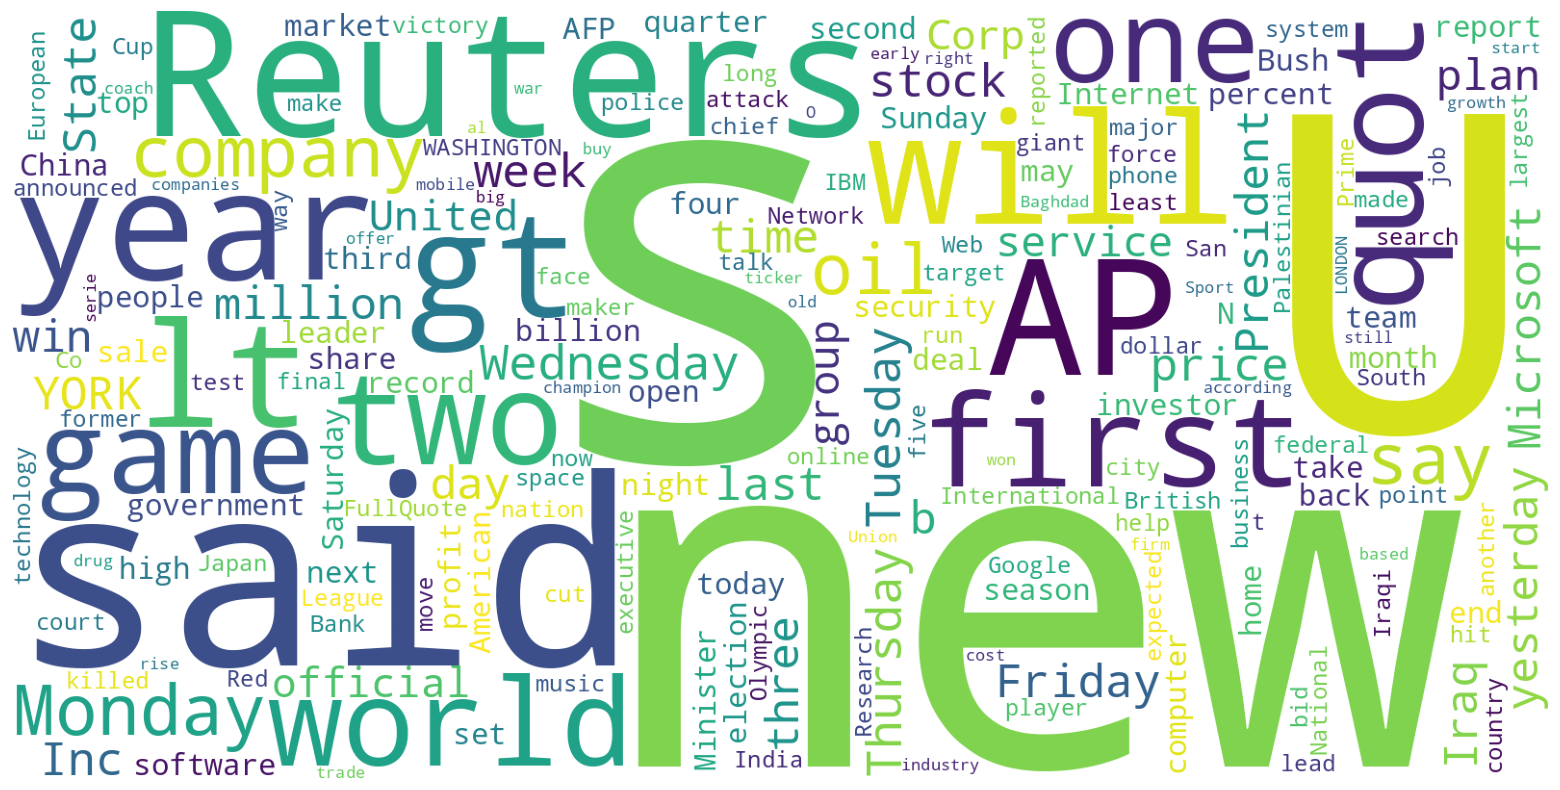

In [27]:
create_cloud_graph(data_train['text'])

### TF-iDF
Speaking of classification. Now as a baseline let's train tf-idf.

1. __Term frequency__:
$$\text{tf}(t, d) = \frac{N(t, d)}{\sum_{k \in V} N(k, d)},$$
where $N(t, d)$ is the number of occurrences of word $t$ in text $d$.


2. __Inverse Document Frequency__
$$\text{idf}(t, D) = \log \frac{|D|}{|\{d \in D | t \in d\}|},$$

where $\left| \{d\in D: t \in d\} \right|$ is the number of texts in the collection containing the word $t$.


$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=4, max_df=0.95)
tfidf_vectorizer.fit(data_train['text']);

In [29]:
tfidf_train = tfidf_vectorizer.transform(data_train['text'])
tfidf_test = tfidf_vectorizer.transform(data_test['text'])

In [30]:
print(tfidf_train.shape)

(120000, 29350)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def train_eval_model(train_X, test_X, train_y, test_y):
    model = LogisticRegression(max_iter=500)
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)

    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)

    print('Train accuracy:', round(train_acc, 3))
    print('Test accuracy: ', round(test_acc, 3))

In [32]:
train_eval_model(tfidf_train, tfidf_test, labels_train, labels_test)

Train accuracy: 0.94
Test accuracy:  0.918


The thing is that this configuration of TF-iDF cannot catch the meaning of the phrases like "not done" counting "not" and "done" separately, losing the context. We can fix this by using n-grams (for example, bi-grams, so we can catch at least "not done" and other negations). To do this we also need to limit the size of vocabulary (otherwise we will get about $|Vocab| = N^2 + N$)

In [33]:
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.95, ngram_range=(1, 3))
tfidf_vectorizer.fit(data_train['text']);

In [34]:
tfidf_train = tfidf_vectorizer.transform(data_train['text'])
tfidf_test = tfidf_vectorizer.transform(data_test['text'])

In [35]:
train_eval_model(tfidf_train, tfidf_test, labels_train, labels_test)

Train accuracy: 0.951
Test accuracy:  0.92


## 3. Word Embeddings

>*highly recommend to read this article if you still have some questions: [illustrated word2vec by Jay Alammar](https://jalammar.github.io/illustrated-word2vec/)*

![skipgram training pic](pictures/skipgram.png)

Here is a quick reminder on how to get the word embedding using the method called `Skip-Gram` in which we are trying to predict the word context by getting a so-called central word.

To dig deeper into the training process you can take a look at this video: [Word Vector Representations: word2vec](https://youtu.be/ERibwqs9p38)

To be fair, there are lots of ways to get embeddings from the text. Each of them has its own advantages and disadvantages, so you have to choose wisely. Today we are going to use `Word2Vec` imported from [`gensim`](https://radimrehurek.com/gensim/auto_examples/). This is another huge library we are going to work with today.

In [36]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,   # embedding vector size
                 min_count=5,      # consider words that occured at least 5 times
                 window=5).wv      # define context as a 5-word window around the target word

In [37]:
# now you can get word vectors!
model.get_vector('word')

array([ 2.4114957 , -0.31356546,  0.54216367,  2.338602  ,  0.16996765,
        1.0770789 ,  1.919829  ,  0.5033955 , -0.637939  , -1.8239502 ,
       -2.2066443 , -2.7721357 ,  0.44763705, -1.1635644 ,  1.1394075 ,
        1.0763836 , -2.0394285 ,  2.1083958 ,  3.1370518 ,  4.184105  ,
        0.42417476,  0.8672703 ,  1.5760708 , -0.2676507 , -0.7192574 ,
       -0.37979957,  2.311111  , -2.6692553 , -1.3310927 , -2.6230721 ,
       -0.6055467 , -4.092147  ], dtype=float32)

In [38]:
# or find similar words directly!
model.most_similar('word')

[('sentence', 0.8360395431518555),
 ('words', 0.795544445514679),
 ('verb', 0.7874417901039124),
 ('phrase', 0.7790347933769226),
 ('sentences', 0.7737114429473877),
 ('pronounce', 0.7730565071105957),
 ('noun', 0.7581795454025269),
 ('phrases', 0.7556993365287781),
 ('symbol', 0.744163990020752),
 ('abbreviation', 0.7370879650115967)]

Instead of training the model all over again we can download pre-trained embeddings that were obtained by training on gigabytes of texts. Embeddings' training always takes time, so it is better to get pre-trained ones.

For example, on ~~twitter~~ X.

In [39]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

Turns out that obtained embeddings have a linear structure.

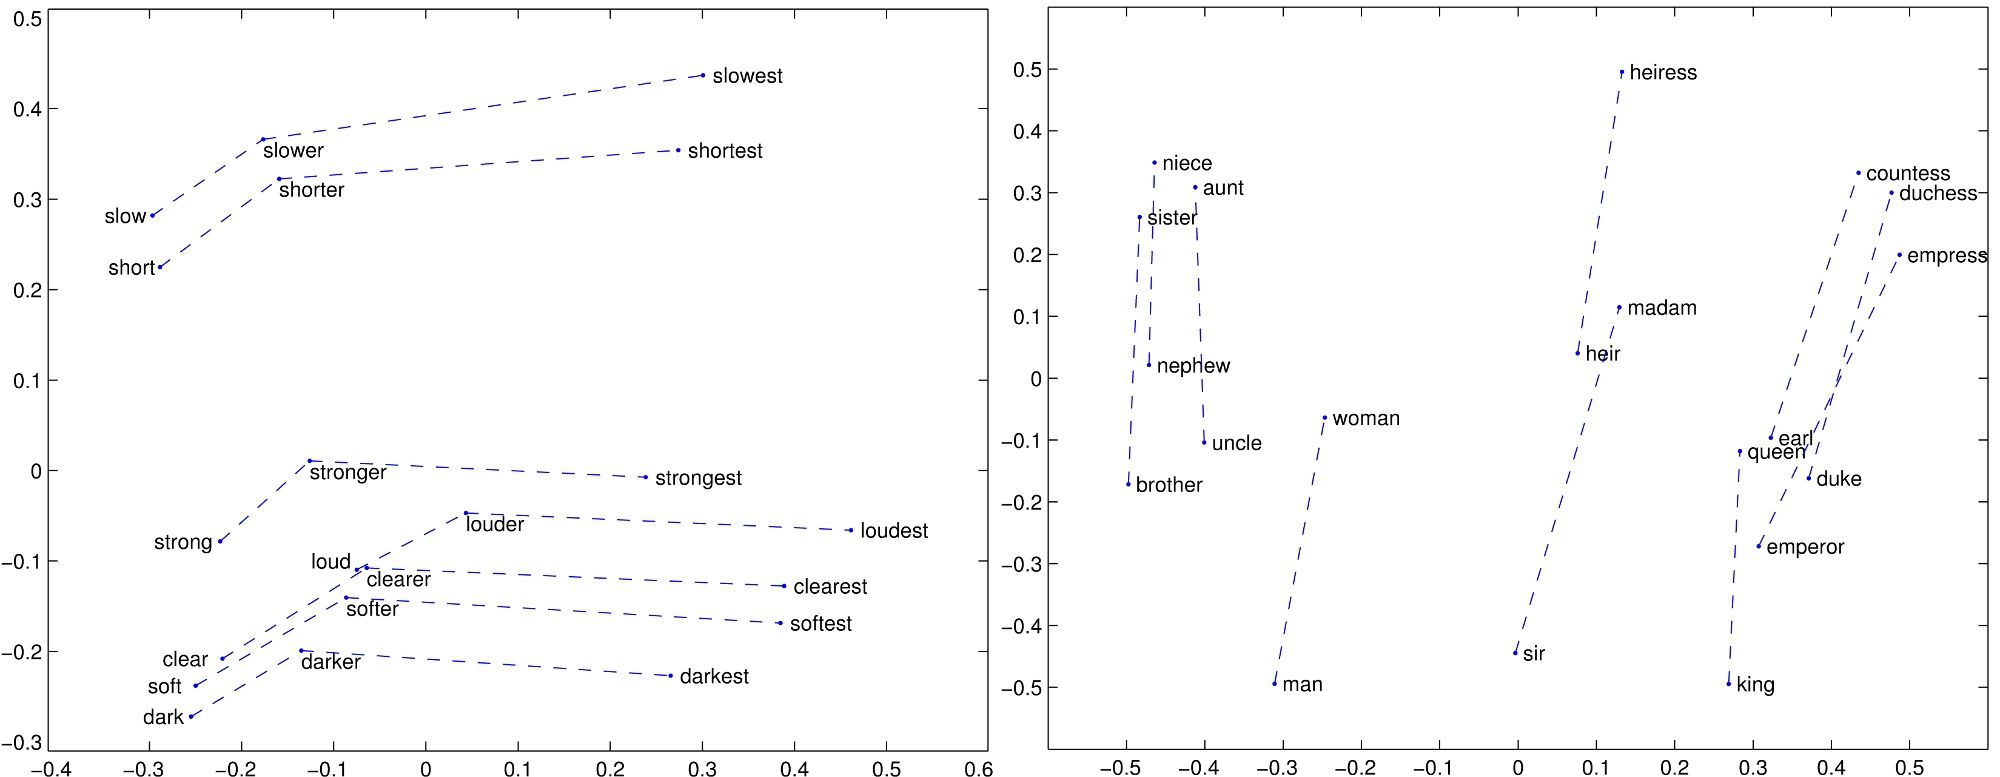

In [40]:
model.most_similar(positive=["woman", "king"], negative=["man"])

[('queen', 0.7052314877510071),
 ('prince', 0.6666139960289001),
 ('mother', 0.6436765193939209),
 ('royal', 0.6417251825332642),
 ('father', 0.5952691435813904),
 ('african', 0.5883978009223938),
 ('princess', 0.588217556476593),
 ('called', 0.5842777490615845),
 ('meets', 0.584027886390686),
 ('american', 0.5815181136131287)]

In [41]:
model.most_similar(positive=["latte", "water"], negative=["milk"])

[('macchiato', 0.608176052570343),
 ('cappuccino', 0.5919400453567505),
 ('warm', 0.5744419693946838),
 ('espresso', 0.572758674621582),
 ('coffee', 0.5530275702476501),
 ('iced', 0.5521674156188965),
 ('mist', 0.5395066142082214),
 ('light', 0.531126081943512),
 ('mocha', 0.5279609560966492),
 ('breeze', 0.5279032588005066)]

In [42]:
model.most_similar(positive=['head', 'sock'], negative=['foot'])

[('pants', 0.6209893226623535),
 ('butt', 0.6058915853500366),
 ('blow', 0.6050280928611755),
 ('socks', 0.6032523512840271),
 ('monkey', 0.5986155867576599),
 ('beanie', 0.5947943925857544),
 ('heads', 0.5903892517089844),
 ('sack', 0.5851455926895142),
 ('tight', 0.5810108780860901),
 ('rocking', 0.579315185546875)]

### Embeddings visualisation

To conveniently view embeddings, you can plot them on a plane. But to do this, you first need to reduce the dimension of the space to 2 or 3. There are special methods for this. We will look at PCA and t-SNE.

We will work with the 1000 most popular words.

In [43]:
words = model.index_to_key[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [46]:
# for each word, compute it's vector with model
word_vectors = # YOUR CODE

In [47]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (1000, 100)
assert np.isfinite(word_vectors).all()

#### Principal component analysis (Метод главных компонент, [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis))

The principal component method is used to reduce the dimensionality of a matrix while preserving the maximum amount of information (data variance). In geometric terms, the method finds the axes along which the data varies the most.

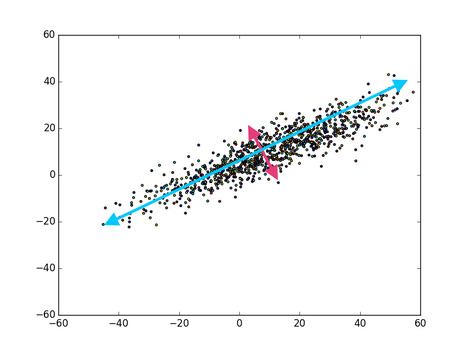


When finding the data axes, the following optimization problem is solved:
<!-- Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_: -->

$$\|X W W^T - X\|^2_2 \to \underset{W}{\min}$$
- $X \in \mathbb{R}^{n \times m}$ - **centered** initial matrix;
- $W \in \mathbb{R}^{m \times d}$ - projection matrix;
- $n$ - number of objects, $m$ - number of features, and $d$ - desired dimension;

From your linear algebra and ML courses, you should know that the solution to this problem can be found using SVD decomposition.

$$ X = U\Sigma V^T$$
$$ W = V_d; $$


In [48]:
from sklearn.decomposition import PCA

# PCA from sklearn center the data automatically
word_vectors_pca = PCA(n_components=2).fit_transform(word_vectors)

In [49]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"

This function builds the interactive plot

Note: the visualization does not properly work in VS Code properly, please use other IDE

In [75]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook, output_file

# Enable inline plotting for Jupyter Notebook
output_notebook()

# Enable plotting for VS Code as a separate .html file
# output_file('plot.html')

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [76]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

figure(id='p1608', ...)

### t-SNE

PCA allows us to reduce the dimension, but the resulting representations are only projections of the data onto a plane. They capture only high-level dependencies and are therefore not the most suitable for visualization.

We want to obtain points that directly represent the structure of multidimensional space. More specifically, we want points that are close together in multidimensional space to correspond to points that are close together on the plane. Conversely, the further apart the points are in multidimensional space, the further apart they should be on the plane. This is precisely the task that t-SNE solves.
You can read more about it [here](https://distill.pub/2016/misread-tsne/) and [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

In [71]:
from sklearn.manifold import TSNE

word_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(word_vectors)

In [72]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1552', ...)

### Visualization of phrases

Of course, with the help of word embeddings, entire texts can be visualized in a similar way. You just need to figure out how to make a single fixed-dimensional embedding from a set of embeddings. Suggest your own method!

The easiest way would be to take the average embedding of all words, but is there a better way?

In [ ]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')
    
    # your code here
    
    return vector

In [ ]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(phrase) for phrase in chosen_phrases])

In [ ]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [ ]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE(
    n_components=2, learning_rate='auto', init='random', perplexity=3
).fit_transform(phrase_vectors)

In [ ]:
draw_vectors(
    phrase_vectors_2d[:, 0],
    phrase_vectors_2d[:, 1],
    phrase=[phrase[:50] for phrase in chosen_phrases],
    radius=20
)

Now, for every question, we can find the most similar ones among all the others!

In [ ]:
# compute vector embedding for all lines in data
data_vectors = np.array([get_phrase_embedding(l) for l in data[:1000]])

In [ ]:
def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    
    # your code here
    
    return nearest

In [ ]:
find_nearest(query="How do i enter the matrix?", k=10)

In [ ]:
find_nearest(query="How does Trump?", k=10)

In [ ]:
find_nearest(query="Why don't i ask a question myself?", k=10)

### Task: train the classificator on w2v embeddings